In [1]:
import pandas as pd
df = pd.read_csv('data/monthly-beer-production-in-austr.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
ts = df['Monthly beer production']

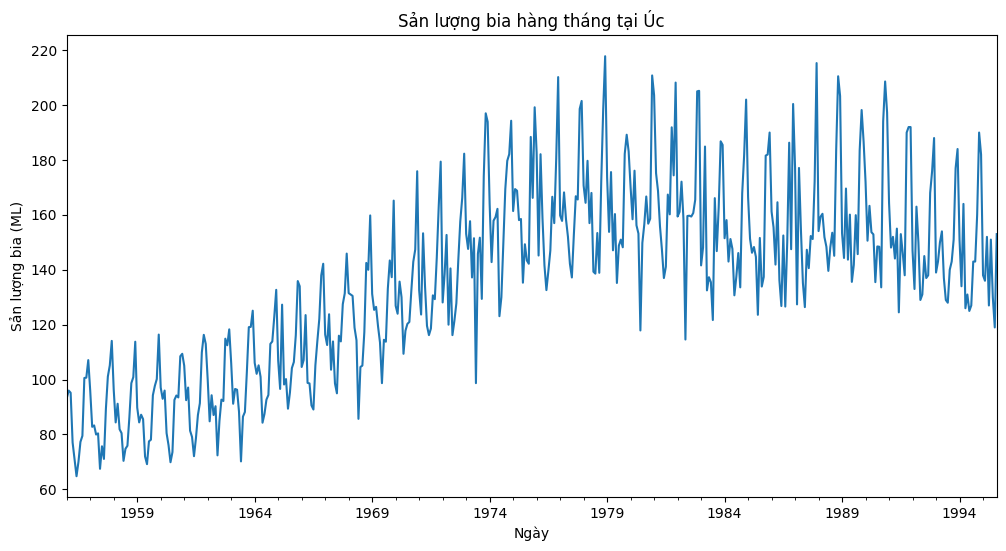

In [2]:
# Trực quan chuỗi thời gian
ts.plot(title='Sản lượng bia hàng tháng tại Úc', figsize=(12, 6))
import matplotlib.pyplot as plt
plt.xlabel('Ngày')
plt.ylabel('Sản lượng bia (ML)')
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print(f'p-value: {result[1]}')

p-value: 0.17762099829132505


---> Chuỗi không dừng  
Cần lấy sai phân

In [4]:
ts_diff = ts.diff().dropna()

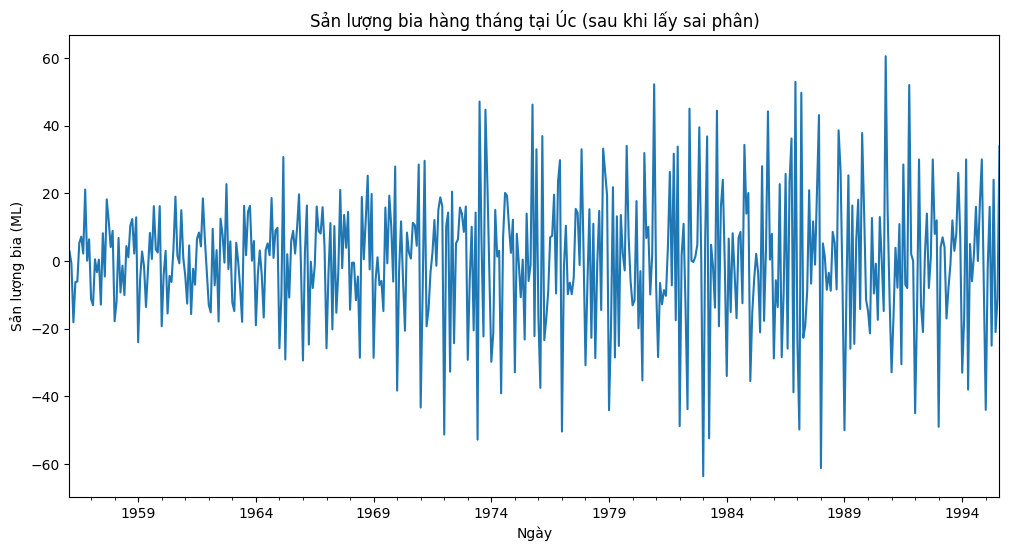

In [5]:
ts_diff.plot(title='Sản lượng bia hàng tháng tại Úc (sau khi lấy sai phân)', figsize=(12, 6))
plt.xlabel('Ngày')
plt.ylabel('Sản lượng bia (ML)')
plt.show()

In [6]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(ts_diff, lags=2).fit()
print(model.summary())

                               AutoReg Model Results                               
Dep. Variable:     Monthly beer production   No. Observations:                  475
Model:                          AutoReg(2)   Log Likelihood               -2060.104
Method:                    Conditional MLE   S.D. of innovations             18.849
Date:                     Tue, 03 Jun 2025   AIC                           4128.209
Time:                             17:34:01   BIC                           4144.845
Sample:                         04-01-1956   HQIC                          4134.752
                              - 08-01-1995                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1492      0.867      0.172      0.863      -1.550       1.848
Monthly beer production.L1    -0.2696      

/home/lamhung/miniconda3/envs/default/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(model.resid, lags=[10], return_df=True)
print(ljung_box)

      lb_stat     lb_pvalue
10  99.951508  5.572854e-17
